In [1]:
from calendar import day_name

import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

scaler=StandardScaler()

In [2]:
def read_ts_csv(filename):
    df = pd.read_csv(filename, parse_dates=['Unnamed: 0'])
                # data
    df.rename(columns={ df.columns[0]: "Time" }, inplace = True)
                # rename the first column to be the 'time' column
    df.drop_duplicates(subset='Time', inplace=True)

                # check for -999 and replace with NaN if applicable
    if -999 in df:
        df[df==-999] = np.nan
        
    return df

# Read in the data using the simple reading and cleaning function
data_ERA5 = read_ts_csv(f'reanalysis.csv')
data_LIDAR = read_ts_csv(f'measurements/lidar.csv')

# Resample the data to 1h intervals
data_ERA5 = data_ERA5.resample('h', on='Time').mean()
data_LIDAR = data_LIDAR.resample('h', on='Time').mean()

# create a merged dataframe containing the ERA5 and the LIDAR data
data_mrgd = pd.merge(data_LIDAR, data_ERA5, how='right', on='Time')

# Ensure that the datetime format is used for the datetime index
data_mrgd.index = pd.to_datetime(data_mrgd.index)


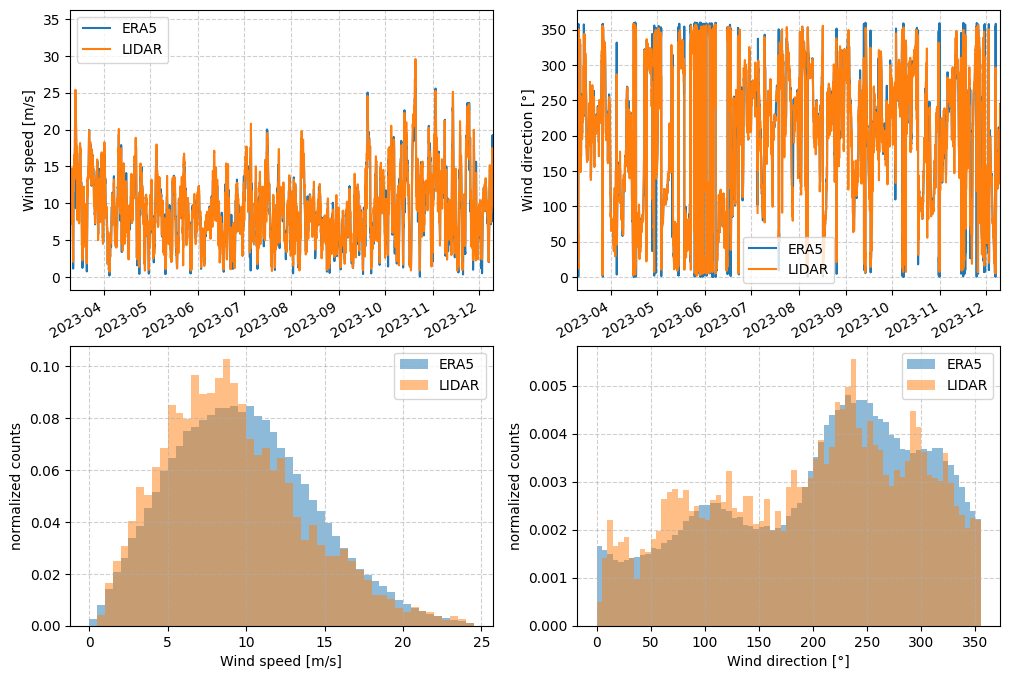

In [3]:
# Some basic plots of the data 

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax = ax.flatten()

ax[0].plot(data_mrgd.index, data_mrgd['WS100'])
ax[0].plot(data_mrgd.index, data_mrgd['WS-99.2'])
ax[0].set_xlim(data_LIDAR.index[0], data_LIDAR.index[-1])

ax[0].set_xlabel('Date') 
ax[0].set_ylabel('Wind speed [m/s]')
ax[0].legend(['100 m', '99.2 m'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=30, ha='right')

ax[1].plot(data_mrgd.index, data_mrgd['WD100'])
ax[1].plot(data_mrgd.index, data_mrgd['WD-99.2'])
ax[1].set_xlim(data_LIDAR.index[0], data_LIDAR.index[-1])

ax[1].set_xlabel('Date') 
ax[1].set_ylabel('Wind direction [°]')
ax[1].legend(['100 m', '99.2 m'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=30, ha='right')

v_bins = np.arange(0,25,0.5)

ax[2].hist(data_mrgd['WS100'], bins=v_bins, density=True, alpha=0.5)
ax[2].hist(data_mrgd['WS-99.2'], bins=v_bins, density=True, alpha=0.5)
ax[2].set_xlabel('Wind speed [m/s]')
ax[2].set_ylabel('normalized counts')

d_bins = np.arange(0,360,5)
ax[3].hist(data_mrgd['WD100'], bins=d_bins, density=True, alpha=0.5)
ax[3].hist(data_mrgd['WD-99.2'], bins=d_bins, density=True, alpha=0.5)
ax[3].set_xlabel('Wind direction [°]')
ax[3].set_ylabel('normalized counts')

# Set properties that should be applied to all subplots
for axs in ax:
    axs.legend(['ERA5', 'LIDAR'])
    axs.grid(True, linestyle="--", alpha=0.6)